In [20]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [21]:
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)
    train = np.array(data['train'])
    test = np.array(data['test'])

X_train = []
y_train = []
X_test = test[:, 0].reshape(-1, 1)
y_test = test[:, 1]

num_splits = 15
num_models = 15
max_degree = 10
num_test_points = len(X_test)

for _ in range(num_splits):
    indices = np.random.choice(len(train), size=int(len(train)/num_splits), replace=False)
    X_train.append(train[indices][:, 0].reshape(-1,1))
    y_train.append(train[indices][:, 1])

In [22]:
bias = []
bias_sq = []
variance = []
mse = []
irred = []

for degree in range(1, max_degree + 1):
    y_pred = []

    for model_idx in range(num_models):
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train[model_idx])
        linear_reg = LinearRegression()
        linear_reg.fit(X_train_poly, y_train[model_idx])
        X_test_poly = poly_features.transform(X_test)
        y_pred.append(linear_reg.predict(X_test_poly))

    y_pred_avg = []
    for point_idx in range(len(y_pred[0])):
        cntr = 0
        for model_idx in range(num_models):
            cntr += y_pred[model_idx][point_idx]
        y_pred_avg.append(cntr / num_models)
    cntr1 = 0
    cntr2 = 0
    for point_idx in range(num_test_points):
        cntr1 += (y_pred_avg[point_idx] - y_test[point_idx])
        cntr2 += (y_pred_avg[point_idx] - y_test[point_idx]) ** 2
    bias.append(cntr1 / num_test_points)
    bias_sq.append(cntr2 / num_test_points)

    var = 0
    for point_idx in range(num_test_points):
        cntr = 0
        for model_idx in range(num_models):
            cntr += (y_pred[model_idx][point_idx] - y_pred_avg[point_idx]) ** 2
        var += cntr / num_models
    variance.append(var / num_test_points)

    se = 0
    for point_idx in range(num_test_points):
        cntr = 0
        for model_idx in range(num_models):
            cntr += (y_test[point_idx] - y_pred[model_idx][point_idx]) ** 2
        se += cntr / num_models
    mse.append(se / num_test_points)

for degree in range(max_degree):
    irred.append(mse[degree] - bias_sq[degree] - variance[degree])

print(bias)
print(bias_sq)
print(variance)
print(irred)
print(mse)

[-0.1942565963476957, -0.1889536436729509, 0.06186943332842998, 0.04761700898255237, 0.044635250292189135, 0.044696875901367526, 0.043327219461363684, 0.03190600206131859, -0.0004947235823861363, -0.028428671492153577]
[1.0042353344631576, 0.9332700079224026, 0.026006474938952494, 0.027334021176022082, 0.02877949750151535, 0.029145903716136595, 0.034205735413962664, 0.03853608418388367, 0.10002490815610687, 0.2633053574736558]
[0.057249000715439466, 0.08921720168542828, 0.111134154013392, 0.14354568289834393, 0.1866526894607234, 0.23468750562954616, 0.2702449840082432, 0.2009994936526857, 0.16797254644326615, 0.1791423627244093]
[1.6792123247455493e-15, 1.8041124150158794e-16, -5.551115123125783e-17, -8.326672684688674e-17, -2.7755575615628914e-17, 8.326672684688674e-17, -5.551115123125783e-17, 2.220446049250313e-16, 3.3306690738754696e-16, 2.7755575615628914e-16]
[1.0614843351785987, 1.022487209607831, 0.13714062895234444, 0.17087970407436592, 0.2154321869622387, 0.26383340934568283, 

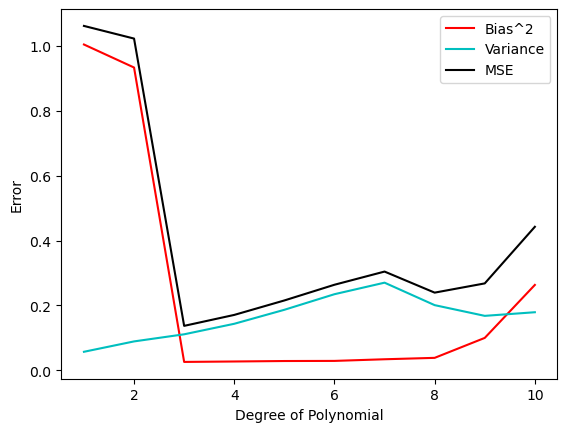

In [24]:
plt.plot(range(1, max_degree + 1), bias_sq, label='Bias^2', color='r')
plt.plot(range(1, max_degree + 1), variance, label='Variance', color='c')
plt.plot(range(1, max_degree + 1), mse, label='MSE', color='k')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
# plt.title('Plot variation of Bias^2, Variance and MSE, versus Degree of Polynomial')
plt.legend()
plt.show()